In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner 
# import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.io.shapereader as shpreader
from math import sqrt


In [2]:
file_vwnd = './vwnd.mon.mean.nc'
file_uwnd = './uwnd.mon.mean.nc'
dataset_vwnd = nc.Dataset(file_vwnd)
dataset_uwnd = nc.Dataset(file_uwnd)
print(dataset_vwnd.variables.keys())
print(dataset_uwnd.variables.keys())

dict_keys(['level', 'lat', 'lon', 'time', 'vwnd'])
dict_keys(['level', 'lat', 'lon', 'time', 'uwnd'])


In [4]:
vlon, vlat = dataset_vwnd.variables['lon'],dataset_vwnd.variables['lat']
vtime = dataset_vwnd.variables['time']
vlevel =dataset_vwnd.variables['level']
vwnd = dataset_vwnd.variables['vwnd']

ulon, ulat = dataset_uwnd.variables['lon'],dataset_uwnd.variables['lat']
utime = dataset_uwnd.variables['time']
ulevel =dataset_uwnd.variables['level']
uwnd = dataset_uwnd.variables['uwnd']

In [5]:
def num_month(a):
    '''
    计算循环的起始年，结束年
    '''
    if a == 1982:
        num_months = (1982 - 1948 + 1) * 12 
        num_month_1997to1982 = (1998 - 1982) * 12 #计算1982年1月到1997年12月的192月数
        start = num_months
        end = start + num_month_1997to1982
    elif a == 1998:
        start = (1998 - 1948 + 1) * 12 + 1
        num_month_2021to1998 = (2022 - 1998) * 12 #计算1998年1月到2021年12月的288月数
        end = start + num_month_2021to1998
    else:
        print("Input must be 1982 or 1998!")
    return start, end

start_82, end_82 = num_month(1982)
start_98, end_98 = num_month(1998)
num_month_1997to1982 = (1998 - 1982) * 12
num_month_2021to1998 = (2022 - 1998) * 12

sum_months = np.zeros(vwnd[:1,0:1].data[0][:,:].shape, dtype=float, order='C')
for i in range(start_82, end_82): 
    tmp_vlevel_850 = vwnd[i:i+1,2:3].data[0][:,:][0]
    tmp_vlevel_200 = vwnd[i:i+1,9:10].data[0][:,:][0]
    tmp_ulevel_850 = uwnd[i:i+1,2:3].data[0][:,:][0]
    tmp_ulevel_200 = uwnd[i:i+1,9:10].data[0][:,:][0]
    vlevel_sqrt = np.zeros(vlevel_850.shape, dtype=float, order='C') 
    _square = np.zeros(vlevel_850.shape, dtype=float, order='C')
    for i in range(len(tmp_vlevel_850)):
        for j in range(len(tmp_vlevel_850[0])):
            tmp = (a[i][j] - b[i][j])**2
            _square[i][j] = tmp
    
    for i in range(len(tmp_vlevel_850)):
        for j in range(len(tmp_vlevel_850[i])):
            tmp = tmp_vlevel_200[i][j] + tmp_vlevel_850[i][j]
            vlevel_sqrt[i][j] = sqrt(tmp)
            
        
    vlevel_square = diff_square(v_200, v_850)
    ulevel_square = diff_square(u_200, u_850)
    

    sum_months += tmp_vwp


In [8]:
vwnd.shape

(904, 17, 73, 144)

In [152]:
vlevel_850 = vwnd[:1,2:3].data[0][:,:][0]
vlevel_200 = vwnd[:1,9:10].data[0][:,:][0]

ulevel_850 = uwnd[:1,2:3].data[0][:,:][0]
ulevel_200 = uwnd[:1,9:10].data[0][:,:][0]

# vlevel_sqrt = np.zeros(vlevel_850.shape, dtype=float, order='C') 

def diff_square(a, b):
    # 求两相同大小的矩阵个元素之间的平方和
    _square = np.zeros(vlevel_850.shape, dtype=float, order='C')
    for i in range(len(a)):
        for j in range(len(b)):
            tmp = (a[i][j] - b[i][j])**2
            _square[i][j] = tmp
    return _square

def diff_sqrt(v_200, v_850, u_200, u_850):
    # 求矩阵个元素的开放
    vlevel_sqrt = np.zeros(vlevel_850.shape, dtype=float, order='C') 
    vlevel_square = diff_square(v_200, v_850)
    ulevel_square = diff_square(u_200, u_850)

    for i in range(len(vlevel_square)):
        for j in range(len(vlevel_square[i])):
            tmp = vlevel_square[i][j] + ulevel_square[i][j]
            vlevel_sqrt[i][j] = sqrt(tmp)
    return vlevel_sqrt
        
vws_sqrt = diff_sqrt(vlevel_200, vlevel_850, ulevel_200, ulevel_850)

In [177]:
def num_month(a):
    '''
    计算循环的起始年，结束年
    '''
    if a == 1982:
        num_months = (1982 - 1948 + 1) * 12 
        num_month_1997to1982 = (1998 - 1982) * 12 #计算1982年1月到1997年12月的192月数

        start = num_months
        end = start + num_month_1997to1982
    elif a == 1998:
        start = (1998 - 1948 + 1) * 12 + 1
        num_month_2021to1998 = (2022 - 1998) * 12 #计算1998年1月到2021年12月的288月数
        end = start + num_month_2021to1998
    else:
        print("Input must be 1982 or 1998!")
    return start, end

# 循环时间
def mean_year(start, end, vwnd, uwnd):
    '''
    计算平均值
    '''
    sum_months = np.zeros(vwnd[:1,0:1].data[0][:,:].shape, dtype=float, order='C')
    for i in range(start, end): 
        tmp_vlevel_850 = vwnd[i:i+1,2:3].data[0][:,:][0]
        tmp_vlevel_200 = vwnd[i:i+1,9:10].data[0][:,:][0]
        tmp_ulevel_850 = uwnd[i:i+1,2:3].data[0][:,:][0]
        tmp_ulevel_200 = uwnd[i:i+1,9:10].data[0][:,:][0]

        tmp_vwp = diff_sqrt(tmp_vlevel_200, tmp_vlevel_850, tmp_ulevel_200, tmp_ulevel_850)

        sum_months += tmp_vwp

#     diff_mean = sum_months / num_months
    return sum_months

start_82, end_82 = num_month(1982)
start_98, end_98 = num_month(1998)

mean_1982 = mean_year(start_82, end_82, vwnd, uwnd)
mean_1998 = mean_year(start_98, end_98, vwnd, uwnd)


In [181]:
diff = mean_1998 - mean_1982

In [269]:
diff[0][:1]

array([[0.83869733, 0.83910362, 0.83879394, 0.83888941, 0.83929499,
        0.83879726, 0.83847725, 0.83869994, 0.8390423 , 0.83850657,
        0.83917276, 0.8385811 , 0.83896263, 0.83880876, 0.83915191,
        0.8390073 , 0.83914042, 0.83894995, 0.83911777, 0.83869074,
        0.8391487 , 0.83972025, 0.83903872, 0.83909083, 0.83848577,
        0.83903427, 0.8388192 , 0.83949121, 0.83906163, 0.83876083,
        0.83923428, 0.83902428, 0.83903773, 0.83868657, 0.83858536,
        0.83794971, 0.83867498, 0.83927088, 0.83888004, 0.83911081,
        0.83905363, 0.83861815, 0.83854643, 0.83866272, 0.83912065,
        0.83859317, 0.83891335, 0.83846512, 0.83869856, 0.83863127,
        0.83924878, 0.83895258, 0.83928234, 0.83888841, 0.83902023,
        0.83889988, 0.83910358, 0.83949088, 0.83878233, 0.83891009,
        0.83840645, 0.83889406, 0.83870448, 0.83920097, 0.83894617,
        0.8389065 , 0.83912304, 0.83870966, 0.83886687, 0.83893774,
        0.83823336, 0.8378421 , 0.83888615, 0.  

In [259]:
print(diff.shape, diff.max(), diff.min())

(1, 73, 144) 9.816610675423775 0.0


In [252]:
vlon.shape

(144,)

In [244]:
vlat[10:83].data.shape

(73,)

In [263]:
from matplotlib import colors,cm
import matplotlib as mpl
import cmaps
from matplotlib.colors import ListedColormap 
# 设置经纬度
lon = vlon[:].data
lat = vlat[10:83].data
diff_2d = diff[0]
# print(diff_2d)
# new_diff=[]
# for i in range(diff_2d.shape[0]):
#     tmp = np.append(diff_2d[i], diff_2d[i][0])
#     new_diff.append(tmp.tolist())
# new_diff = np.array(new_diff)

proj = ccrs.PlateCarree(central_longitude=180)
# proj = ccrs.PlateCarree()
leftlon, rightlon, lowerlat, upperlat = (-180, 180.1, -45, 46)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks(np.arange(-180,180.1,30), crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-45,46,15), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(b)700hpaRH',loc='left',fontsize =12)

cont = fig_ax1.contourf(lon, lat, diff_2d, 
                 levels=np.arange(0,10,0.7), # 颜色分片
                        zorder=0,
                transform=ccrs.PlateCarree(),
                        cmap=plt.cm.RdBu_r
#                         cmap=cmaps.BlueWhiteOrangeRed
                       )

norm = colors.Normalize(vmin=0, vmax=10)    #确定colormap的最大最小值

cmap=plt.cm.RdBu_r  #引用NCL的colormap
# cmap=cmaps.BlueWhiteOrangeRed  

newcolors=cmap(np.linspace(0,1,12))#分片操作，生成0到1的12个数据间隔的数组   

newcmap=ListedColormap(newcolors[::1])  #重构为新的colormap

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,
#                                        cmap=plt.cm.RdBu_r
                                       cmap = newcmap
                                      ),
#                  format='%.2g',
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(0,10,0.7).tolist(), # colorbar分片                                                 
                 extend='both',
#                  label =mul_symbol_text+'1e+06',
                fraction=0.012) 

plt.savefig("vor.png",dpi=300,bbox_inches='tight')
plt.show()

73 144


<Figure size 432x288 with 0 Axes>

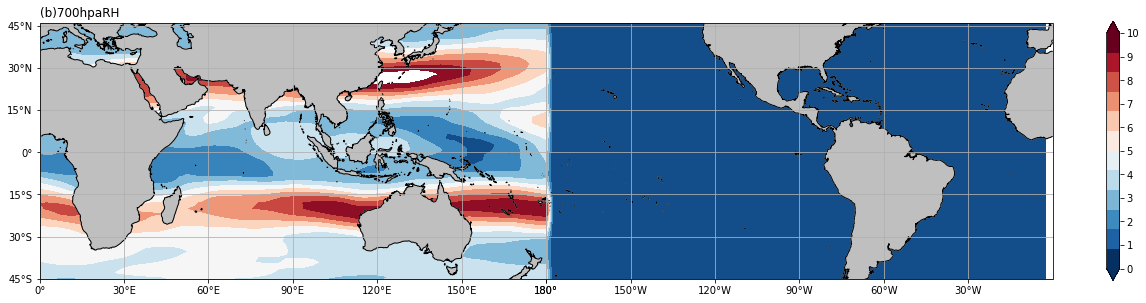

In [265]:
from matplotlib import colors,cm
import matplotlib as mpl
import cmaps
from matplotlib.colors import ListedColormap 
# 设置经纬度
lon = vlon[:].data
# lon = np.append(vlon[:].data, [360.0])
lat = vlat[10:83].data

# 调整经纬度 向东偏移180
# lon_pacific = lon[:] + 180
# a, b = np.hsplit(diff, [179])
# diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
diff_2d = diff[0] 
# new_diff=[]
# for i in range(diff_2d.shape[0]):
#     tmp = np.append(diff_2d[i], diff_2d[i][0])
#     new_diff.append(tmp.tolist())
# new_diff = np.array(new_diff)

fig = plt.figure(figsize=(15,5))

proj = ccrs.PlateCarree(central_longitude=180)
# proj = ccrs.PlateCarree()
leftlon, rightlon, lowerlat, upperlat = (-180, 180.1, -45, 46)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks(np.arange(-180,180.1,30), crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-45,46,15), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(b)700hpaRH',loc='left',fontsize =12)

cont = fig_ax1.contourf(lon, lat, diff_2d, 
                 levels=np.arange(0,10,1), # 颜色分片
                        zorder=0,
                transform=ccrs.PlateCarree(),
                        cmap=plt.cm.RdBu_r
#                         cmap=cmaps.BlueWhiteOrangeRed
                       )
# fig_ax1.contourf(lon, lat, diff,levels=[0,0.05,1], zorder=1, hatches=['....',None],colors="none", transform=ccrs.PlateCarree())

norm = colors.Normalize(vmin=0, vmax=10)    #确定colormap的最大最小值

cmap=plt.cm.RdBu_r  #引用NCL的colormap
# cmap=cmaps.BlueWhiteOrangeRed  

newcolors=cmap(np.linspace(0,1,12))#分片操作，生成0到1的12个数据间隔的数组   

newcmap=ListedColormap(newcolors[::1])  #重构为新的colormap

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,
#                                        cmap=plt.cm.RdBu_r
                                       cmap = newcmap
                                      ),
#                  format='%.2g',
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(0,10.1,1).tolist(), # colorbar分片                                                 
                 extend='both',
#                  label =mul_symbol_text+'1e+06',
                fraction=0.012) 

# plt.colorbar(cont,fraction=0.012)

plt.savefig("vor.png",dpi=300,bbox_inches='tight')
plt.show()

[0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]


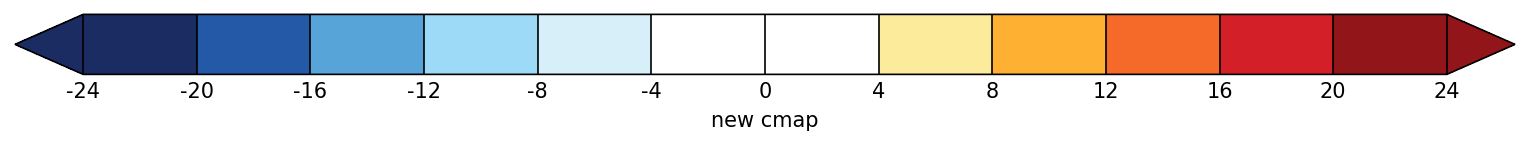

In [74]:
import numpy as np

import cmaps 

import matplotlib.pyplot as plt

import matplotlib as mpl   

from matplotlib.colors import ListedColormap 
#######################生成画板#####################################
fig=plt.figure(figsize=(10,8),dpi=150)

# ax1=fig.add_axes([0,0,1,0.05])                                                 
ax2=fig.add_axes([0,0.25,1,0.05])  
#######################定义新的colormap#########################################
norm =mpl.colors.Normalize(vmin=-24, vmax=24)    #确定colormap的最大最小值

cmap=cmaps.BlueWhiteOrangeRed  #引用NCL的colormap

newcolors=cmap(np.linspace(0,1,12))#分片操作，生成0到1的12个数据间隔的数组   

print(np.linspace(0,1,12))

newcmap=ListedColormap(newcolors[::1])  #重构为新的colormap
print(newcmap)
###########################################################################        
# fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap='BlueWhiteOrangeRed'),              
#                  cax=ax1,                                                      
#                  orientation='horizontal',    label='old cmap' ,
# ticks=[-0.4,-0.32,-0.24,-0.16,-0.08,0,0.08,0.16,0.24,0.32,0.4]     ,                                                    
#                  extend='both')                 

fc2=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=newcmap),                                            
                  cax=ax2,         format='%.2g'    ,                                             
                  orientation='horizontal',     label='new cmap' ,
# ticks=[-0.4,-0.32,-0.24,-0.16,-0.08,0,0.08,0.16,0.24,0.32,0.4]     , 
                 ticks = np.arange(-24,24.1,4).tolist(),
                  extend='both')  
fc2.ax.tick_params(which='major',direction='in',length=29)